In [1]:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
dataDir = 'Datas/'
csvs = os.listdir(dataDir)

# 긍정이 너무 많은 데이터 삭제
rmList = [ 'joker_review.csv', 'the-dark-knight_review.csv' ]
for rm in rmList:
    csvs.remove( rm )

for csv in csvs:
    print(csv)

after-earth_review.csv
arrival_review.csv
battlefield-earth-a-saga-of-the-year-3000_review.csv
birds-of-prey-and-the-fantabulous-emancipation-of-one-harley-quinn_review.csv
blade-runner-2049_review.csv
captain-marvel_review.csv
cats_review.csv
catwoman_review.csv
dark-phoenix_review.csv
dirty-grandpa_review.csv
epic-movie_review.csv
fantastic-four-2015_review.csv
fifty-shades-darker_review.csv
fifty-shades-of-grey_review.csv
frozen-2013_review.csv
ghost-rider_review.csv
ghostbusters-2016_review.csv
gods-of-egypt_review.csv
gravity_review.csv
green-lantern_review.csv
inception_review.csv
interstellar_review.csv
jack-and-jill_review.csv
jupiter-ascending_review.csv
justice-league_review.csv
la-la-land_review.csv
logan-2017_review.csv
man-of-steel_review.csv
men-in-black-international_review.csv
parasite_review.csv
star-wars-episode-ix---the-rise-of-skywalker_review.csv
star-wars-episode-vii---the-force-awakens_review.csv
star-wars-episode-viii---the-last-jedi_review.csv
suicide-squad_rev

In [4]:
data = pd.read_csv( dataDir + csvs[0])

for csv in csvs[1 : ]:
    file = pd.read_csv( dataDir + csv )
    data = data.append(file, ignore_index = True )

data

,Unnamed: 0,review,label
0,0,more and more it seems as if sixth sense was a...,0
1,1,"M Night is a very ambitious director, he only ...",0
2,2,Cannot believe I was sincerely looking forward...,0
3,3,M. Night Shyamalan left his brain back at the ...,0
4,4,Just started watching this film and what's goi...,0
...,...,...,...
22523,47,"I usually make my reviews marking The good, th...",0
22524,48,Zoolander is another example of Hollywood's la...,0
22525,50,literally a cinematic embarrassment at first i...,0
22526,51,members only..Zoolander 2Zoolander 2 isn't wor...,0


In [5]:
# movie 의 e 제거 안되는 방법
neg_frequency = []
pos_frequency = []

for i in range(len(data)):
    only_english = re.sub('[^a-zA-Z ]', ' ', data['review'][i])
    #print(only_english)
    no_capitals = only_english.lower().split()
    #print(no_capitals)
    stops = set(stopwords.words('english'))
    stops.update( ('luke', 'disney', 'nolan', 'christopher', 'inception') )
    no_stops = [word for word in no_capitals if not word in stops]
    #print(no_stops)
    lemmatizer = WordNetLemmatizer()
    lemmatizer_words = [lemmatizer.lemmatize(word, 'v') for word in no_stops]
    lemmatizer_words = [lemmatizer.lemmatize(word, 'a') for word in lemmatizer_words]
    lemmatizer_words = [lemmatizer.lemmatize(word, 'n') for word in lemmatizer_words]
    if data['label'][i] == 0:
        neg_frequency.extend(lemmatizer_words)
    else:
        pos_frequency.extend(lemmatizer_words)
    data.loc[i, 'review'] = ' '.join( lemmatizer_words )
    #print(' '.join( stemmer_words ))
    
print(data['review'])

0        seem sixth sense anomaly jaden smith act way p...
1        night ambitious director one ambition become b...
2        cannot believe sincerely look forward see movi...
3        night shyamalan leave brain back film sign ear...
4        start watch film go narrator sound like englis...
                               ...                        
22523    usually make review mark good bad ugly thing m...
22524    zoolander another example hollywood lack origi...
22525    literally cinematic embarrassment first think ...
22526    member zoolander zoolander worth consider movi...
22527    really want like movie really bad whoever writ...
Name: review, Length: 22528, dtype: object


In [6]:
data

,Unnamed: 0,review,label
0,0,seem sixth sense anomaly jaden smith act way p...,0
1,1,night ambitious director one ambition become b...,0
2,2,cannot believe sincerely look forward see movi...,0
3,3,night shyamalan leave brain back film sign ear...,0
4,4,start watch film go narrator sound like englis...,0
...,...,...,...
22523,47,usually make review mark good bad ugly thing m...,0
22524,48,zoolander another example hollywood lack origi...,0
22525,50,literally cinematic embarrassment first think ...,0
22526,51,member zoolander zoolander worth consider movi...,0


In [7]:
data['review'].replace('', np.nan, inplace=True)
print(data.isnull().sum())
data.loc[data.review.isnull()][:5]

Unnamed: 0      0
review        152
label           0
dtype: int64


,Unnamed: 0,review,label
448,83,NaN,1
452,3,NaN,0
524,87,NaN,0
537,101,NaN,0
564,133,NaN,0


In [8]:
import matplotlib.pyplot as plt
data['label'].value_counts().plot(kind = 'bar', color = ('#66cc33', '#ff0000'))
plt.savefig( 'Images/Pos_Neg_Histogram.png' )
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
data = data.dropna(how = 'any')
print(len(data))

22376


In [10]:
from collections import Counter

frequency = neg_frequency + pos_frequency
count = pd.Series(frequency)
print(count.value_counts().head(20))

count = Counter(frequency)
count.most_common(10)

movie        41685
film         18249
like         12564
character    12043
good         11870
make         11061
one          10266
see           9850
star          9782
war           8761
bad           8671
story         7814
go            7632
time          7248
great         7130
get           6855
really        6308
think         6214
watch         6107
even          5906
dtype: int64


[('movie', 41685),
 ('film', 18249),
 ('like', 12564),
 ('character', 12043),
 ('good', 11870),
 ('make', 11061),
 ('one', 10266),
 ('see', 9850),
 ('star', 9782),
 ('war', 8761)]

In [11]:
data['label'].value_counts()

1    12143
0    10233
Name: label, dtype: int64

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

VOCAB_SIZE = 20000

tfidf_vec = TfidfVectorizer(max_features = VOCAB_SIZE, min_df = 2, sublinear_tf = True)
label_encoder = LabelEncoder()

X = tfidf_vec.fit_transform(data['review'])
y = label_encoder.fit_transform(data['label'])

print(X)
print(len(tfidf_vec.get_feature_names()))
print(len(tfidf_vec.vocabulary_))
print(sorted(tfidf_vec.vocabulary_.items()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  (0, 17500)	0.3075193671014895
  (0, 4539)	0.19437518270258866
  (0, 1297)	0.35156274835664164
  (0, 12004)	0.3420134103422213
  (0, 18292)	0.14822664953286374
  (0, 178)	0.1468622870230183
  (0, 15358)	0.26569380001737103
  (0, 8921)	0.3412297030409947
  (0, 713)	0.4205508348381052
  (0, 14800)	0.19005528036044958
  (0, 15225)	0.39004006772837607
  (0, 14725)	0.17718561743235184
  (1, 2474)	0.22603735474024267
  (1, 15763)	0.2254966695803699
  (1, 5337)	0.2845713505387575
  (1, 717)	0.13795324356385122
  (1, 10885)	0.05060232285210431
  (1, 10031)	0.08083603422091953
  (1, 10211)	0.19761135675604535
  (1, 18688)	0.12176836279993862
  (1, 12123)	0.1672002389047563
  (1, 9857)	0.1248267385458941
  (1, 8311)	0.2247001598351024
  (1, 7175)	0.07807399641682532
  (1, 395)	0.2989327416421138
  :	:
  (22375, 4903)	0.13698321337749175
  (22375, 6107)	0.1339767400450054
  (22375, 16984)	0.1434633087682785
  (22375, 10597)	0.19029749802939686
  (22375, 15262)	0.18781052066869883
  (22375, 8621)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

classifiers = {
    'NaiveBayes' : MultinomialNB( ),
    'SGD': SGDClassifier( ),
    'Random_Forest': RandomForestClassifier( ),
    'Decision_Tree' : DecisionTreeClassifier( ),
    'Logistic_Regression' : LogisticRegression( )
}

for lbl, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print( lbl, precision_score(predictions, y_test, average='micro' ) )

NaiveBayes 0.897899910634495
SGD 0.9224754244861484
Random_Forest 0.8402591599642538
Decision_Tree 0.7799374441465594
Logistic_Regression 0.9211349419124218


In [14]:
from scipy.sparse import eye

d = eye(len(tfidf_vec.vocabulary_))
# word_pred = model.predict_proba(d)
word_pred = classifiers['Logistic_Regression'].predict_proba(d)
inverse_vocab = {idx: word for word, idx in tfidf_vec.vocabulary_.items()}
print(d)
print( word_pred )
print( inverse_vocab )

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 24)	1.0
  :	:
  (18773, 18773)	1.0
  (18774, 18774)	1.0
  (18775, 18775)	1.0
  (18776, 18776)	1.0
  (18777, 18777)	1.0
  (18778, 18778)	1.0
  (18779, 18779)	1.0
  (18780, 18780)	1.0
  (18781, 18781)	1.0
  (18782, 18782)	1.0
  (18783, 18783)	1.0
  (18784, 18784)	1.0
  (18785, 18785)	1.0
  (18786, 18786)	1.0
  (18787, 18787)	1.0
  (18788, 18788)	1.0
  (18789, 18789)	1.0
  (18790, 18790)	1.0
  (18791, 18791)	1.0
  (18792, 18792)	1.0
  (18793, 18793)	1.0
  (18794, 18794)	1.0
  (18795, 18795)	1.0
  (18796, 18796)	1.0
  (18797, 18797)	1.0
[[0.56523475 0.43476525]
 [0.60147158 0.39852842]
 [0.57017721 0.42982279]
 ...
 [0.54077367 0.45922633]
 [0.57040

In [15]:
from collections import defaultdict
by_cls = defaultdict(Counter)
print(by_cls)
for word_idx, pred in enumerate(word_pred):
    for class_idx, score in enumerate(pred):
        cls = label_encoder.classes_[class_idx]
        by_cls[cls][inverse_vocab[word_idx]] = score
print(by_cls)

defaultdict(<class 'collections.Counter'>, {})
defaultdict(<class 'collections.Counter'>, {0: Counter({'bad': 0.9997791291486873, 'terrible': 0.9981513210753934, 'bore': 0.9979400035287477, 'awful': 0.9954984054473778, 'money': 0.9940142538054852, 'waste': 0.9927825657813345, 'nothing': 0.9902354403227932, 'garbage': 0.9879595482886341, 'mess': 0.9857691671580912, 'horrible': 0.9840440914244744, 'poor': 0.9817447363274789, 'disappoint': 0.9796114295008678, 'even': 0.9787832672577768, 'destroy': 0.9779928892925572, 'ruin': 0.9773371158222859, 'disappointment': 0.9759389645437448, 'stupid': 0.9691292144149539, 'suck': 0.9635823836377939, 'fail': 0.9604498732229156, 'poorly': 0.9584363329991245, 'crap': 0.9547571308279894, 'bland': 0.9534597462190346, 'joke': 0.9505483008960937, 'character': 0.9454037965033439, 'hole': 0.9443396200661366, 'dull': 0.9430417369091336, 'save': 0.939726779658121, 'trash': 0.9370204742290149, 'minute': 0.933990043935428, 'write': 0.9315100639355225, 'script': 

In [16]:
for k in by_cls:
    words = [x[0] for x in by_cls[k].most_common(10)]
    print(k, ':', ' '.join(words))

0 : bad terrible bore awful money waste nothing garbage mess horrible
1 : great best perfect amaze love fun enjoy masterpiece awesome action


In [17]:
print( by_cls[0] )

Counter({'bad': 0.9997791291486873, 'terrible': 0.9981513210753934, 'bore': 0.9979400035287477, 'awful': 0.9954984054473778, 'money': 0.9940142538054852, 'waste': 0.9927825657813345, 'nothing': 0.9902354403227932, 'garbage': 0.9879595482886341, 'mess': 0.9857691671580912, 'horrible': 0.9840440914244744, 'poor': 0.9817447363274789, 'disappoint': 0.9796114295008678, 'even': 0.9787832672577768, 'destroy': 0.9779928892925572, 'ruin': 0.9773371158222859, 'disappointment': 0.9759389645437448, 'stupid': 0.9691292144149539, 'suck': 0.9635823836377939, 'fail': 0.9604498732229156, 'poorly': 0.9584363329991245, 'crap': 0.9547571308279894, 'bland': 0.9534597462190346, 'joke': 0.9505483008960937, 'character': 0.9454037965033439, 'hole': 0.9443396200661366, 'dull': 0.9430417369091336, 'save': 0.939726779658121, 'trash': 0.9370204742290149, 'minute': 0.933990043935428, 'write': 0.9315100639355225, 'script': 0.9296556539842064, 'completely': 0.929301787708687, 'lazy': 0.9288918299685597, 'kill': 0.927

In [18]:
words_positive = [ x[0] for x in by_cls[1].most_common(30) ]
words_negative = [ x[0] for x in by_cls[0].most_common(30) ]

In [19]:
count = Counter(pos_frequency)
positive_frequency = { }
for wp in words_positive:
    positive_frequency[wp] = count[wp]
print( positive_frequency )

{'great': 5726, 'best': 3807, 'perfect': 1429, 'amaze': 1985, 'love': 3263, 'fun': 1498, 'enjoy': 1689, 'masterpiece': 676, 'awesome': 878, 'action': 3334, 'good': 6981, 'excellent': 667, 'bite': 1188, 'entertain': 853, 'solid': 433, 'definitely': 834, 'brilliant': 528, 'fantastic': 842, 'enjoyable': 457, 'critic': 1294, 'still': 1720, 'incredible': 496, 'well': 3039, 'outstanding': 216, 'complain': 277, 'favorite': 590, 'hater': 176, 'overall': 1082, 'classic': 445, 'think': 3773}


In [20]:
count = Counter(neg_frequency)
negative_frequency = { }
for wp in words_negative:
    negative_frequency[wp] = count[wp]
print( negative_frequency )

{'bad': 6827, 'terrible': 1474, 'bore': 1669, 'awful': 875, 'money': 1049, 'waste': 982, 'nothing': 1728, 'garbage': 680, 'mess': 725, 'horrible': 688, 'poor': 694, 'disappoint': 818, 'even': 3649, 'destroy': 884, 'ruin': 764, 'disappointment': 310, 'stupid': 902, 'suck': 504, 'fail': 643, 'poorly': 442, 'crap': 521, 'bland': 354, 'joke': 985, 'character': 6789, 'hole': 861, 'dull': 273, 'save': 818, 'trash': 393, 'minute': 927, 'write': 1655}


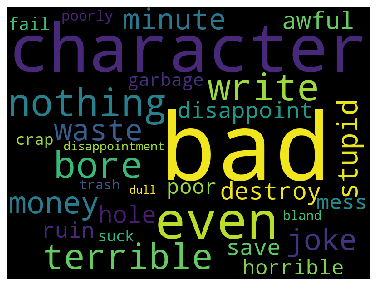

In [21]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

wordcloud_neg = WordCloud( stopwords = STOPWORDS, background_color = 'black', #배경색 
                      width = 800, height = 600).generate_from_frequencies( negative_frequency )

plt.figure(figsize = (10, 5)) # (가로인치, 세로인치) 
plt.axis("off") # 축눈금 제거 
wordcloud_neg.to_file( 'Images/word_cloud_negative.png' )
plt.imshow(wordcloud_neg) # 이미지가 표시되도록 

plt.show() # 최종 출력문

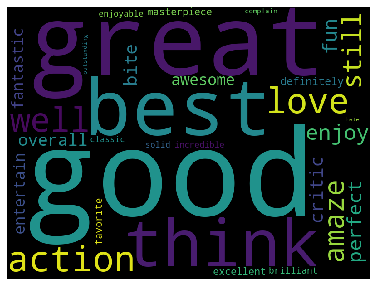

In [22]:
wordcloud_pos = WordCloud( stopwords = STOPWORDS, background_color = 'black', #배경색 
                      width = 800, height = 600).generate_from_frequencies( positive_frequency )
plt.figure(figsize = (10, 5)) # (가로인치, 세로인치) 
plt.axis("off") # 축눈금 제거 
wordcloud_pos.to_file( 'Images/word_cloud_positive.png' )
plt.imshow(wordcloud_pos)

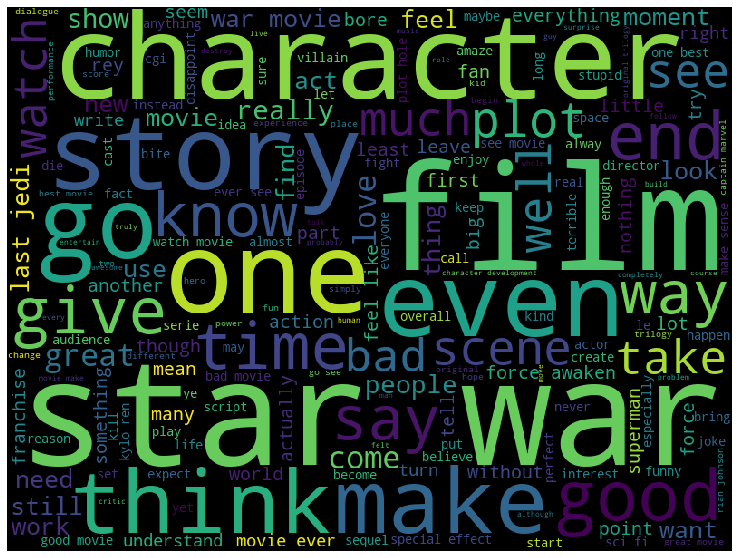

In [23]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', #배경색 
                      width = 800, height = 600).generate(' '.join(data['review'])) 
plt.figure(figsize = (15, 10)) # (가로인치, 세로인치) 
plt.axis("off") # 축눈금 제거 
wordcloud.to_file( 'Images/word_cloud.png' )
plt.imshow(wordcloud) # 이미지가 표시되도록 
plt.show() # 최종 출력문